In [213]:
import pandas as pd
from sklearn.metrics import roc_curve, auc,accuracy_score,classification_report,f1_score, confusion_matrix
df=pd.read_csv('fnewss.csv')

In [214]:
import matplotlib.pyplot as plt
import seaborn as sb

In [215]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [216]:
len(df)

20800

In [217]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [218]:
df = df.fillna('') # fill the null values

In [219]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [220]:
df['new_column'] = df['author']+' '+df['title']

In [221]:
df['new_column']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: new_column, Length: 20800, dtype: object

In [222]:
df

,id,title,author,text,label,new_column
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [223]:
X = df['new_column']
Y = df['label']

In [224]:
X

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: new_column, Length: 20800, dtype: object

In [225]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

# Feature extraction by TfidfVectorizer

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 23355)	0.18006497451107856
  (0, 22649)	0.26575278886038384
  (0, 22289)	0.3484071341454308
  (0, 19171)	0.22537992364975484
  (0, 12902)	0.3024224900242886
  (0, 12528)	0.24883399099107747
  (0, 11409)	0.20615188166061463
  (0, 11307)	0.1532265401605094
  (0, 10387)	0.1844880289323935
  (0, 7574)	0.23047267305353566
  (0, 6145)	0.24677171892553343
  (0, 5800)	0.2502787762405247
  (0, 5508)	0.2993429551929777
  (0, 4507)	0.20531415441295317
  (0, 3862)	0.30579573877221844
  (0, 904)	0.26354004814013343
  (1, 23748)	0.2966210296019264
  (1, 15149)	0.15862263711495958
  (1, 10134)	0.18787145765749733
  (1, 8420)	0.7045992054867243
  (1, 5469)	0.2624012615566619
  (1, 4298)	0.19024289659874757
  (1, 3509)	0.37751839443307017
  (1, 3075)	0.15310531118537438
  (1, 2544)	0.2899843833664323
  :	:
  (20797, 11262)	0.12516633187998083
  (20797, 10427)	0.20792477683235197
  (20797, 5559)	0.20389975589596085
  (20797, 3394)	0.14456424605079038
  (20797, 2273)	0.31989436828531154
  (20797, 1

# Make train_test_split the data

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [228]:
print('Training Set')
print(X_train.shape)
print(Y_train.shape)

print('Test Set')
print(X_test.shape)
print(Y_test.shape)

Training Set
(16640, 25173)
(16640,)
Test Set
(4160, 25173)
(4160,)


# Using LogisticRegression method

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.96      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



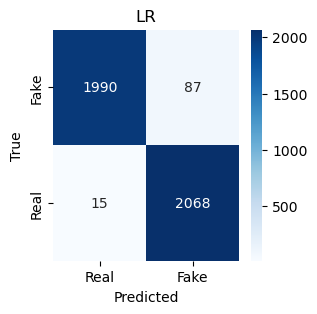

Accuracy Score : 97.55 %
Precision: 0.9927988478156505
f1_score: 0.9759320434167059
roc_auc_score: 0.9760737367717598
recall_score: 0.9596287703016241


In [229]:
from sklearn.metrics import precision_score,roc_auc_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
prediction_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(prediction_lr, Y_test)
print(classification_report(Y_test,prediction_lr))
conf_matrix = confusion_matrix(Y_test, prediction_lr)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("LR")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Accuracy Score :", round(accuracy_lr*100 ,2), "%")
#precision
print('Precision:',precision_score(prediction_lr, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_lr, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_lr, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_lr, Y_test))

In [230]:
nws=['Darrell Lucus House Dem Aide: We Didn’t Even S...']
cv_nws=vectorizer.transform(nws)
pr=lr.predict(cv_nws)
print(pr)
if (pr == 1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


# Using DecisionTreeClassifier

DecisionTreeClassifier Accuracy Score : 99.13 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



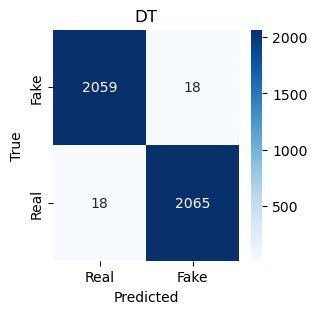

Precision: 0.9913586173787806
f1_score: 0.9913586173787806
roc_auc_score: 0.99134613584394
recall_score: 0.9913586173787806


In [231]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
prediction_dtc=dtc.predict(X_test)
accuracy_dt = accuracy_score(prediction_dtc, Y_test)
print("DecisionTreeClassifier Accuracy Score :", round(accuracy_dt*100 ,2), "%")
print(classification_report(Y_test,prediction_dtc))
conf_matrix = confusion_matrix(Y_test, prediction_dtc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("DT")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#precision
print('Precision:',precision_score(prediction_dtc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_dtc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_dtc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_dtc, Y_test))

# Using BernoulliNB

BernoulliNB_test_data_accuracy: 98.22 %
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2077
           1       0.98      0.98      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



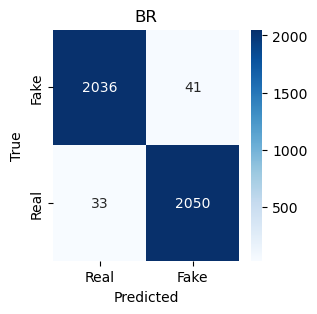

Precision: 0.9841574651944311
f1_score: 0.9822712026832774
roc_auc_score: 0.982221211345824
recall_score: 0.9803921568627451


In [232]:
from sklearn.naive_bayes import BernoulliNB
b=BernoulliNB()
b.fit(X_train,Y_train)
prediction_bc=b.predict(X_test)
accuracy_bc = accuracy_score(prediction_bc, Y_test)
print('BernoulliNB_test_data_accuracy:',round(accuracy_bc*100 ,2), "%")
print(classification_report(Y_test,prediction_bc))
conf_matrix = confusion_matrix(Y_test, prediction_bc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("BR")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_bc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_bc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_bc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_bc, Y_test))

# Using MultinomialNB

MultinomialNB_test_data_accuracy: 95.46 %
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.96      0.95      0.95      4160
weighted avg       0.96      0.95      0.95      4160



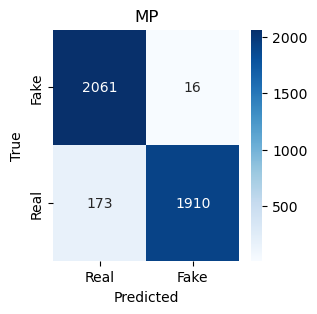

Precision: 0.9169467114738358
f1_score: 0.9528560738338737
roc_auc_score: 0.9571265284645583
recall_score: 0.9916926272066459


In [233]:
from sklearn.naive_bayes import MultinomialNB
m=MultinomialNB()
m.fit(X_train,Y_train)
prediction_mc=m.predict(X_test)
accuracy_mc = accuracy_score(prediction_mc, Y_test)
print('MultinomialNB_test_data_accuracy:',round(accuracy_mc*100 ,2), "%")
print(classification_report(Y_test,prediction_mc))
conf_matrix = confusion_matrix(Y_test, prediction_mc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("MP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#precision
print('Precision:',precision_score(prediction_mc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_mc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_mc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_mc, Y_test))

# Using RandomForestClassifier

RandomForestClassifier_test_data_accuracy: 99.23 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



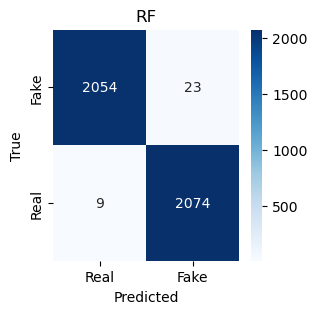

Precision: 0.9956793086893903
f1_score: 0.9923444976076554
roc_auc_score: 0.9923346858182788
recall_score: 0.989031950405341


In [234]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
prediction_rfc=rfc.predict(X_test)
accuracy_rf= accuracy_score(prediction_rfc, Y_test)
print('RandomForestClassifier_test_data_accuracy:',round(accuracy_rf*100 ,2), "%")
print(classification_report(Y_test,prediction_rfc))
conf_matrix = confusion_matrix(Y_test, prediction_rfc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("RF")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_rfc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_rfc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_rfc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_rfc, Y_test))

# SVM algorithms method SVC

SVC_model_test_data_accuracy: 98.56 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2077
           1       0.98      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



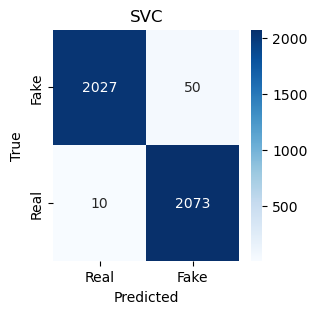

Precision: 0.9951992318771004
f1_score: 0.9857346647646219
roc_auc_score: 0.9857696209386825
recall_score: 0.976448422044277


In [235]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,Y_train)
prediction_svc=svm_model.predict(X_test)
accuracy_svc = accuracy_score(prediction_svc, Y_test)
print('SVC_model_test_data_accuracy:',round(accuracy_svc*100 ,2), "%")
print(classification_report(Y_test,prediction_svc))
conf_matrix = confusion_matrix(Y_test, prediction_svc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("SVC")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_svc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_svc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_svc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_svc, Y_test))

# linear SVC

Linear SVC model test data accuracy: 99.16 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



C:\Users\alahi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


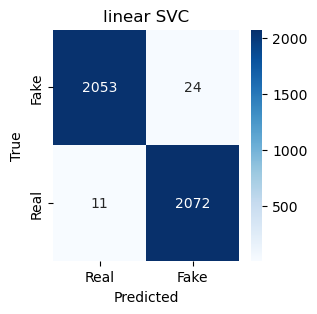

Precision: 0.9947191550648103
f1_score: 0.9916247906197655
roc_auc_score: 0.9916100804781348
recall_score: 0.9885496183206107


In [236]:
from sklearn.svm import LinearSVC
l_svm_model=LinearSVC()
l_svm_model.fit(X_train,Y_train)
prediction_lsvc=l_svm_model.predict(X_test)
accuracy_lsvc = accuracy_score(prediction_lsvc, Y_test)
print('Linear SVC model test data accuracy:',round(accuracy_lsvc*100 ,2), "%")
print(classification_report(Y_test,prediction_lsvc))

conf_matrix = confusion_matrix(Y_test, prediction_lsvc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("linear SVC")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_lsvc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_lsvc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_lsvc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_lsvc, Y_test))

# KNN

KNN_model_testing_data_accuracy_model_test_data_accuracy: 91.11 %
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2077
           1       0.99      0.83      0.90      2083

    accuracy                           0.91      4160
   macro avg       0.92      0.91      0.91      4160
weighted avg       0.92      0.91      0.91      4160



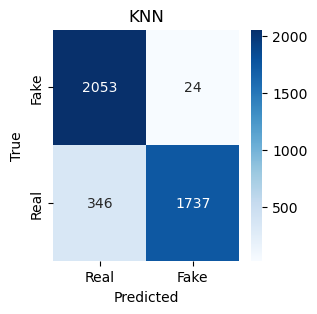

Precision: 0.8338934229476717
f1_score: 0.9037460978147762
roc_auc_score: 0.9210723093736529
recall_score: 0.9863713798977853


In [237]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=143)

KNN_model.fit(X_train,Y_train)
prediction_knn=KNN_model.predict(X_test)
accuracy_knn = accuracy_score(prediction_knn, Y_test)
print('KNN_model_testing_data_accuracy_model_test_data_accuracy:',round(accuracy_knn*100 ,2), "%")
print(classification_report(Y_test,prediction_knn))

conf_matrix = confusion_matrix(Y_test, prediction_knn) 

 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_knn, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_knn, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_knn, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_knn, Y_test))

# XGBClassifier

In [238]:

from xgboost import XGBClassifier

xgboost_model_testing_data_accuracy_model_test_data_accuracy: 98.8 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2077
           1       0.98      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



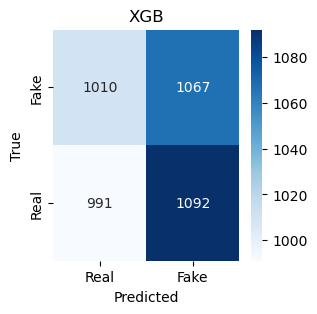

Precision: 0.9985597695631301
f1_score: 0.98812351543943
roc_auc_score: 0.9882137491151525
recall_score: 0.9779031499764927


In [239]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(X_train,Y_train)
prediction_xgb=xgb.predict(X_test)
accuracy_xgb = accuracy_score(prediction_xgb, Y_test)
print('xgboost_model_testing_data_accuracy_model_test_data_accuracy:',round(accuracy_xgb*100 ,2), "%")
print(classification_report(Y_test,prediction_xgb))

conf_matrix = confusion_matrix(Y_test, prediction_gbc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("XGB")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_xgb, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_xgb, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_xgb, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_xgb, Y_test))

# MLPClassifier

Iteration 1, loss = 0.33401382
Iteration 2, loss = 0.01356168
Iteration 3, loss = 0.00285513
Iteration 4, loss = 0.00135601
Iteration 5, loss = 0.00085413
Iteration 6, loss = 0.00070041
Iteration 7, loss = 0.00061049
Iteration 8, loss = 0.00055063
Iteration 9, loss = 0.00050741
Iteration 10, loss = 0.00047458
Iteration 11, loss = 0.00044848
Iteration 12, loss = 0.00042680
Iteration 13, loss = 0.00040818
Iteration 14, loss = 0.00039198
Iteration 15, loss = 0.00037748
Iteration 16, loss = 0.00036430
Iteration 17, loss = 0.00035216
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLPClassifier_model_testing_data_accuracy_model_test_data_accuracy: 98.94 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99    

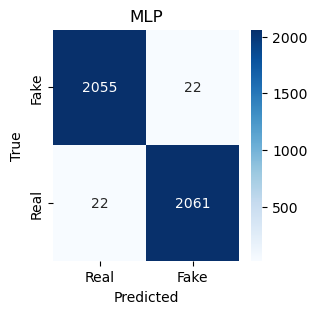

Precision: 0.9894383101296207
f1_score: 0.9894383101296207
roc_auc_score: 0.9894230549203713
recall_score: 0.9894383101296207


In [240]:
from sklearn.neural_network import MLPClassifier
# Create model object
clf_MLP = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf_MLP.fit(X_train,Y_train)
prediction_mlp=clf_MLP.predict(X_test)
accuracy_mlp = accuracy_score(prediction_mlp, Y_test)
print('MLPClassifier_model_testing_data_accuracy_model_test_data_accuracy:',round(accuracy_mlp*100 ,2), "%")
print(classification_report(Y_test,prediction_mlp))

conf_matrix = confusion_matrix(Y_test, prediction_mlp)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_mlp, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_mlp, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_mlp, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_mlp, Y_test))

# ExtraTreesClassifier

ExtraTreesClassifier_model_testing_data_accuracy: 98.85 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



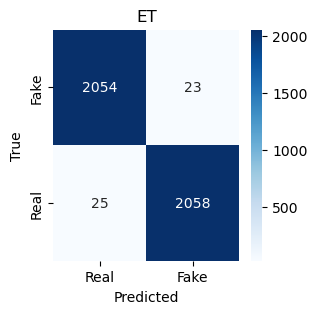

Precision: 0.9879980796927509
f1_score: 0.9884726224783862
roc_auc_score: 0.988461304655442
recall_score: 0.9889476213358962


In [241]:
from sklearn.ensemble import ExtraTreesClassifier
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)
ETclassifier.fit(X_train,Y_train)
prediction_etc=ETclassifier.predict(X_test)
accuracy_etc = accuracy_score(prediction_etc, Y_test)
print('ExtraTreesClassifier_model_testing_data_accuracy:',round(accuracy_etc*100 ,2), "%")
print(classification_report(Y_test,prediction_etc))

conf_matrix = confusion_matrix(Y_test, prediction_etc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("ET")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_etc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_etc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_etc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_etc, Y_test))

# AdaBoostClassifier

AdaBoostClassifier_model_testing_data_accuracy: 98.27 %
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



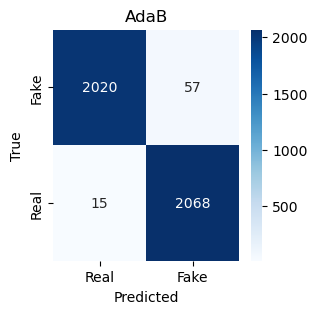

Precision: 0.9927988478156505
f1_score: 0.9828897338403042
roc_auc_score: 0.982902731608614
recall_score: 0.9731764705882353


In [242]:
from sklearn.ensemble import AdaBoostClassifier
AB= AdaBoostClassifier()
AB.fit(X_train,Y_train)
prediction_abc=AB.predict(X_test)
accuracy_abc = accuracy_score(prediction_abc, Y_test)
print('AdaBoostClassifier_model_testing_data_accuracy:',round(accuracy_abc*100 ,2), "%")
print(classification_report(Y_test,prediction_abc))

conf_matrix = confusion_matrix(Y_test, prediction_abc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("AdaB")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_abc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_abc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_abc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_abc, Y_test))

# GradientBoostingClassifier

GradientBoostingClassifier_model_testing_data_accuracy: 96.56 %
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2077
           1       0.94      1.00      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



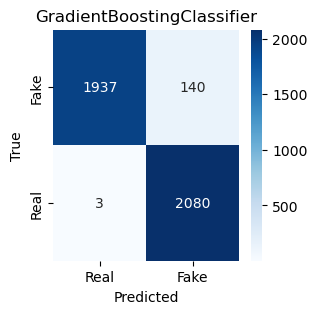

Precision: 0.9985597695631301
f1_score: 0.9667673716012084
roc_auc_score: 0.9676952725921798
recall_score: 0.9369369369369369


In [243]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)
prediction_gbc = GB.predict(X_test)
accuracy_gbc = accuracy_score(prediction_gbc, Y_test)
print('GradientBoostingClassifier_model_testing_data_accuracy:',round(accuracy_gbc*100 ,2), "%")
print(classification_report(Y_test,prediction_gbc))


conf_matrix = confusion_matrix(Y_test, prediction_gbc)   
 # showing the confusion matrix in heatmap
plt.figure(figsize=(3, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Fake','Real'])
plt.title("GradientBoostingClassifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#precision
print('Precision:',precision_score(prediction_gbc, Y_test))
#f1_score
print("f1_score:",f1_score(prediction_gbc, Y_test))
#roc_auc_score
print("roc_auc_score:",roc_auc_score(prediction_gbc, Y_test))
#recall_score
print("recall_score:",recall_score(prediction_gbc, Y_test))

In [244]:
plotdata = pd.DataFrame({
    'Model':['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','BernoulliNB','MultinomialNB','SVC','LinearSVC','KNN','XGBClassifier','MLPClassifier','ExtraTreesClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
    "Accuracy":[round(accuracy_rf*100,2),round(accuracy_dt*100,2),round(accuracy_lr*100,2),round(accuracy_bc*100,2),round(accuracy_mc*100,2),round(accuracy_svc*100,2),round(accuracy_lsvc*100,2),round(accuracy_knn*100,2),round(accuracy_xgb*100,2),round(accuracy_mlp*100,2),round(accuracy_etc*100,2),round(accuracy_abc*100 ,2),round(accuracy_gbc*100 ,2)],
    "Precision":[round(precision_score(prediction_rfc, Y_test)*100,2),round(precision_score(prediction_dtc, Y_test)*100,2),round(precision_score(prediction_lr, Y_test)*100,2),round(precision_score(prediction_bc, Y_test)*100,2),round(precision_score(prediction_mc, Y_test)*100,2),round(precision_score(prediction_svc, Y_test)*100,2),round(precision_score(prediction_lsvc, Y_test)*100,2),round(precision_score(prediction_knn, Y_test)*100,2),round(precision_score(prediction_xgb, Y_test)*100,2),round(precision_score(prediction_mlp, Y_test)*100,2),round(precision_score(prediction_etc, Y_test)*100,2),round(precision_score(prediction_abc, Y_test)*100,2),round(precision_score(prediction_gbc, Y_test)*100,2)],
    "F-1 Score":[round(f1_score(prediction_rfc, Y_test)*100,2),round(f1_score(prediction_dtc, Y_test)*100,2),round(f1_score(prediction_lr, Y_test)*100,2),round(f1_score(prediction_bc, Y_test)*100,2),round(f1_score(prediction_mc, Y_test)*100,2),round(f1_score(prediction_svc, Y_test)*100,2),round(f1_score(prediction_lsvc, Y_test)*100,2),round(f1_score(prediction_knn, Y_test)*100,2),round(f1_score(prediction_xgb, Y_test)*100,2),round(f1_score(prediction_mlp, Y_test)*100,2),round(f1_score(prediction_etc, Y_test)*100,2),round(f1_score(prediction_abc, Y_test)*100,2),round(f1_score(prediction_gbc, Y_test)*100,2)],
    "Roc_auc_score":[round(roc_auc_score(prediction_rfc, Y_test)*100,2),round(roc_auc_score(prediction_dtc, Y_test)*100,2),round(roc_auc_score(prediction_lr, Y_test)*100,2),round(roc_auc_score(prediction_bc, Y_test)*100,2),round(roc_auc_score(prediction_mc, Y_test)*100,2),round(roc_auc_score(prediction_svc, Y_test)*100,2),round(roc_auc_score(prediction_lsvc, Y_test)*100,2),round(roc_auc_score(prediction_knn, Y_test)*100,2),round(roc_auc_score(prediction_xgb, Y_test)*100,2),round(roc_auc_score(prediction_mlp, Y_test)*100,2),round(roc_auc_score(prediction_etc, Y_test)*100,2),round(roc_auc_score(prediction_abc, Y_test)*100,2),round(roc_auc_score(prediction_gbc, Y_test)*100,2)],
    "Recall_score":[round(recall_score(prediction_rfc, Y_test)*100,2),round(recall_score(prediction_dtc, Y_test)*100,2),round(recall_score(prediction_lr, Y_test)*100,2),round(recall_score(prediction_bc, Y_test)*100,2),round(recall_score(prediction_mc, Y_test)*100,2),round(recall_score(prediction_svc, Y_test)*100,2),round(recall_score(prediction_lsvc, Y_test)*100,2),round(recall_score(prediction_knn, Y_test)*100,2),round(recall_score(prediction_xgb, Y_test)*100,2),round(recall_score(prediction_mlp, Y_test)*100,2),round(recall_score(prediction_etc, Y_test)*100,2),round(recall_score(prediction_abc, Y_test)*100,2),round(recall_score(prediction_gbc, Y_test)*100,2)],
})

plotdata
                                            


,Model,Accuracy,Precision,F-1 Score,Roc_auc_score,Recall_score
0,RandomForestClassifier,99.23,99.57,99.23,99.23,98.90
1,DecisionTreeClassifier,99.13,99.14,99.14,99.13,99.14
2,LogisticRegression,97.55,99.28,97.59,97.61,95.96
3,BernoulliNB,98.22,98.42,98.23,98.22,98.04
4,MultinomialNB,95.46,91.69,95.29,95.71,99.17
5,SVC,98.56,99.52,98.57,98.58,97.64
6,LinearSVC,99.16,99.47,99.16,99.16,98.85
7,KNN,91.11,83.39,90.37,92.11,98.64
8,XGBClassifier,98.80,99.86,98.81,98.82,97.79
9,MLPClassifier,98.94,98.94,98.94,98.94,98.94


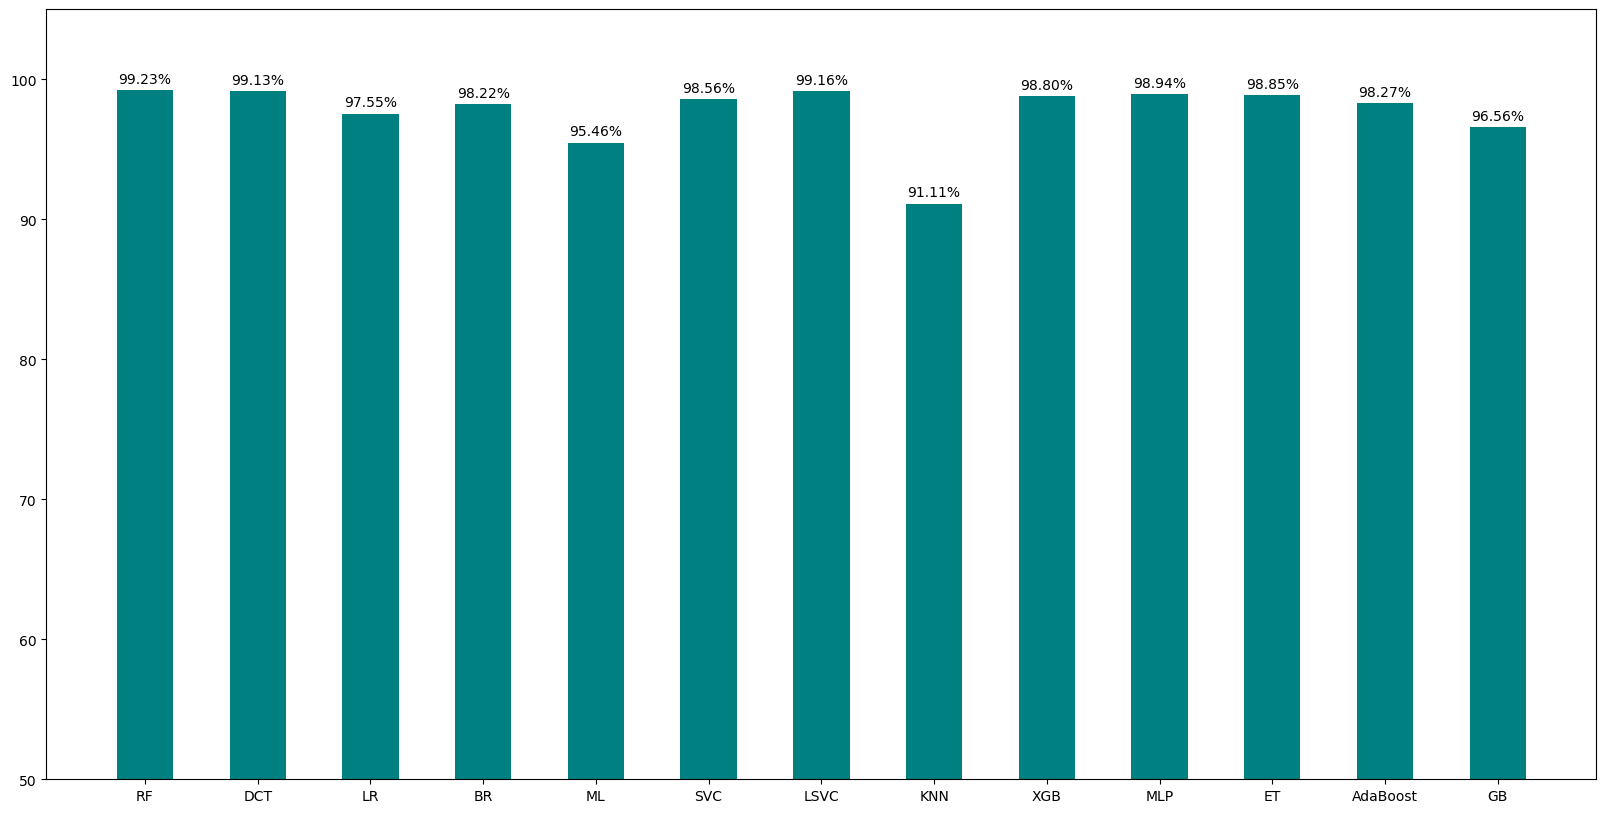

In [245]:
import numpy as np

model = np.array(['RF','DCT','LR','BR','ML','SVC','LSVC','KNN','XGB','MLP','ET','AdaBoost','GB'])
accuracy = np.array([round(accuracy_rf*100,2),round(accuracy_dt*100,2),round(accuracy_lr*100,2),round(accuracy_bc*100,2),round(accuracy_mc*100,2),round(accuracy_svc*100,2),round(accuracy_lsvc*100,2),round(accuracy_knn*100,2),round(accuracy_xgb*100,2),round(accuracy_mlp*100,2),round(accuracy_etc*100,2),round(accuracy_abc*100 ,2),round(accuracy_gbc*100 ,2)])
plt.figure(figsize=(20, 10))
bars = plt.bar(model, accuracy, color='teal', width=0.5)
plt.ylim(50, 105)
#plt.grid(True, axis='y')

# Add data labels (accuracy values) above each bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.annotate(f'{acc:.2f}%',  # Format accuracy to two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset label above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()

In [246]:
sorted_plotdata = plotdata.sort_values(by='Accuracy', ascending=False)
sorted_plotdata

,Model,Accuracy,Precision,F-1 Score,Roc_auc_score,Recall_score
0,RandomForestClassifier,99.23,99.57,99.23,99.23,98.90
6,LinearSVC,99.16,99.47,99.16,99.16,98.85
1,DecisionTreeClassifier,99.13,99.14,99.14,99.13,99.14
9,MLPClassifier,98.94,98.94,98.94,98.94,98.94
10,ExtraTreesClassifier,98.85,98.80,98.85,98.85,98.89
8,XGBClassifier,98.80,99.86,98.81,98.82,97.79
5,SVC,98.56,99.52,98.57,98.58,97.64
11,AdaBoostClassifier,98.27,99.28,98.29,98.29,97.32
3,BernoulliNB,98.22,98.42,98.23,98.22,98.04
2,LogisticRegression,97.55,99.28,97.59,97.61,95.96


# Bar charts

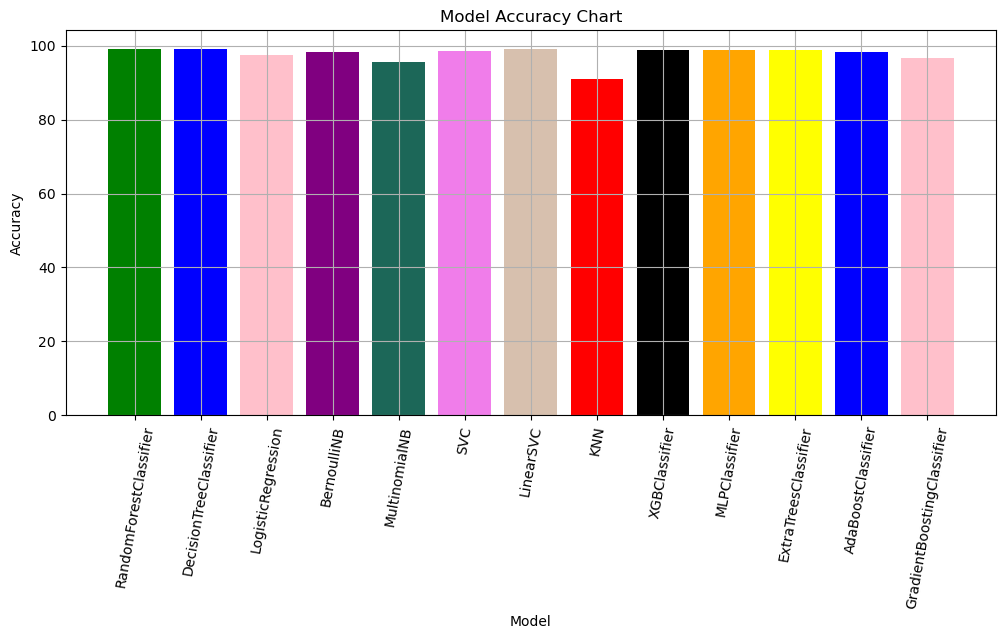

In [247]:
import matplotlib.pyplot as plt
colors = ['green','blue','pink','purple',"#1C6758",'#F07DEA','#D7C0AE','red','black','orange',"yellow",'blue','pink']
plotdata = pd.DataFrame({
    'Model':['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','BernoulliNB','MultinomialNB','SVC','LinearSVC','KNN','XGBClassifier','MLPClassifier','ExtraTreesClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
    "Accuracy":[round(accuracy_rf*100,2),round(accuracy_dt*100,2),round(accuracy_lr*100,2),round(accuracy_bc*100,2),round(accuracy_mc*100,2),round(accuracy_svc*100,2),round(accuracy_lsvc*100,2),round(accuracy_knn*100,2),round(accuracy_xgb*100,2),round(accuracy_mlp*100,2),round(accuracy_etc*100,2),round(accuracy_abc*100 ,2),round(accuracy_gbc*100 ,2)]})

plt.figure(figsize=(12,5))
plt.bar(plotdata['Model'],plotdata['Accuracy'],color = colors)
plt.title("Model Accuracy Chart")
plt.xlabel("Model")
plt.xticks(rotation = 80)
plt.ylabel("Accuracy")
plt.grid(zorder=0)

# Pie charts

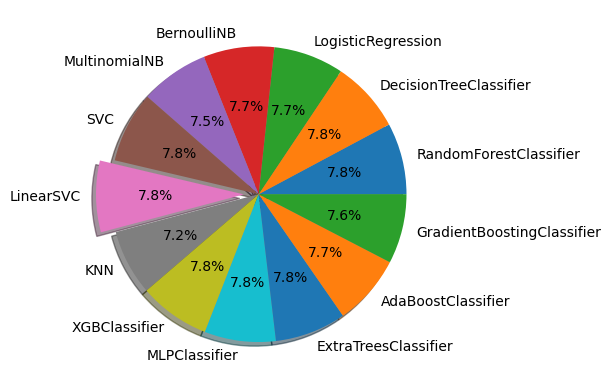

In [248]:
import numpy as np
Model=np.array(['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','BernoulliNB','MultinomialNB','SVC','LinearSVC','KNN','XGBClassifier','MLPClassifier','ExtraTreesClassifier','AdaBoostClassifier','GradientBoostingClassifier'])
Accuracy=np.array([round(accuracy_rf*100,2),round(accuracy_dt*100,2),round(accuracy_lr*100,2),round(accuracy_bc*100,2),round(accuracy_mc*100,2),round(accuracy_svc*100,2),round(accuracy_lsvc*100,2),round(accuracy_knn*100,2),round(accuracy_xgb*100,2),round(accuracy_mlp*100,2),round(accuracy_etc*100,2),round(accuracy_abc*100 ,2),round(accuracy_gbc*100 ,2)])
myexplode = [0,0,0,0,0,0,0.1,0,0,0,0,0,0]
plt.pie(Accuracy, labels = Model,autopct='%1.1f%%',explode = myexplode,shadow=True,)
#plt.legend(title = "Model:")
plt.show()

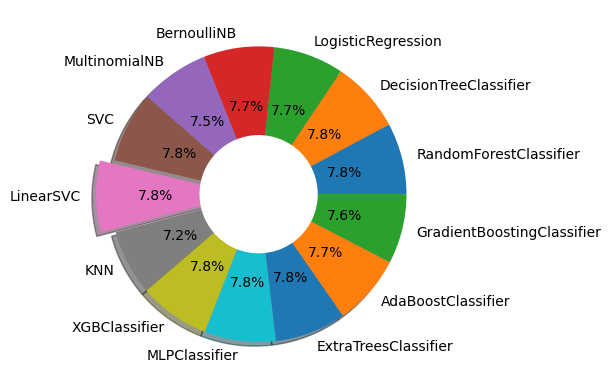

In [249]:
size_centre = [10]
#Creating the doughnut chart
pie1 = plt.pie(Accuracy, labels = Model,autopct='%1.1f%%',explode = myexplode,shadow=True, radius =1)
pie2 = plt.pie(size_centre,radius = 0.4,colors = 'w')
plt.show()

<Axes: >

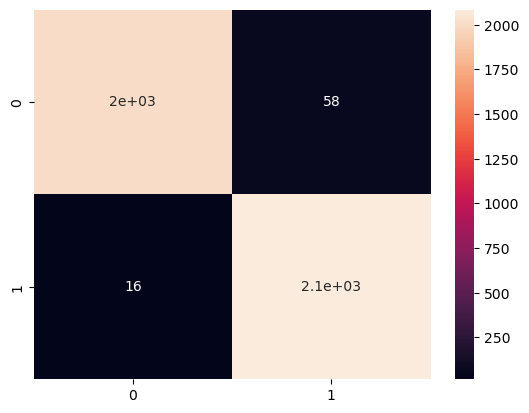

In [250]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

<Axes: xlabel='label', ylabel='count'>

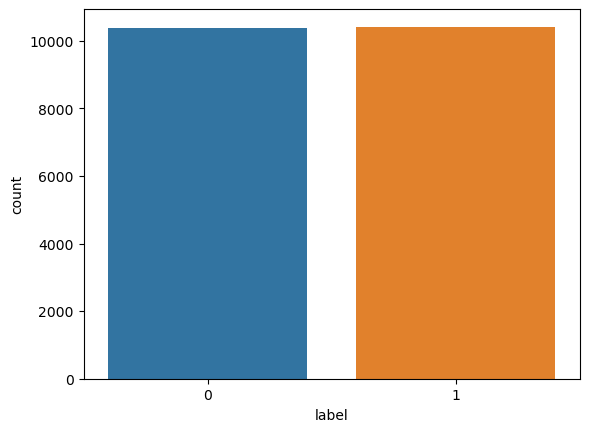

In [251]:
#visualize how many fake and real news here
sns.countplot (x = df["label"])

In [252]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


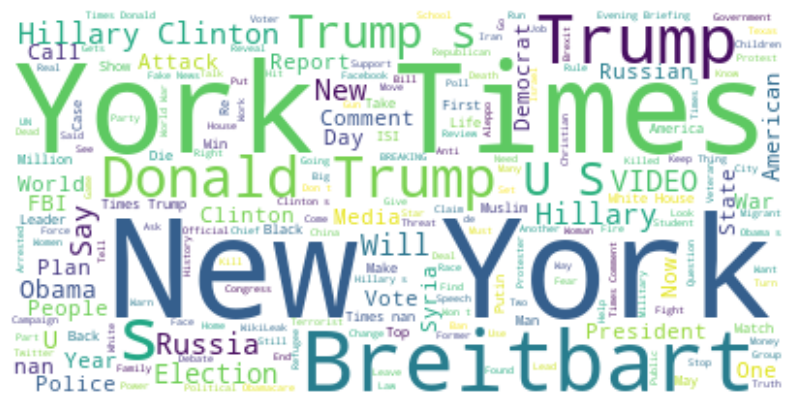

WordCloud figure saved as 'wordcloud.png'


<Figure size 640x480 with 0 Axes>

In [253]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Import the required libraries

# Step 2: Read the CSV file
data = pd.read_csv('fnews.csv')

# Step 3: Preprocess the data (if needed)

# Step 4: Convert the column values to strings and create a string containing all the words
text = ' '.join(data['title'].astype(str))

# Step 5: Generate the WordCloud
wordcloud = WordCloud(background_color='white').generate(text)

# Step 6: Display the WordCloud
plt.figure(figsize=(10,10),facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Step 7: Save the WordCloud figure
plt.savefig('wordcloud.png', dpi=300)

# Step 8: Show the saved figure path
print("WordCloud figure saved as 'wordcloud.png'")



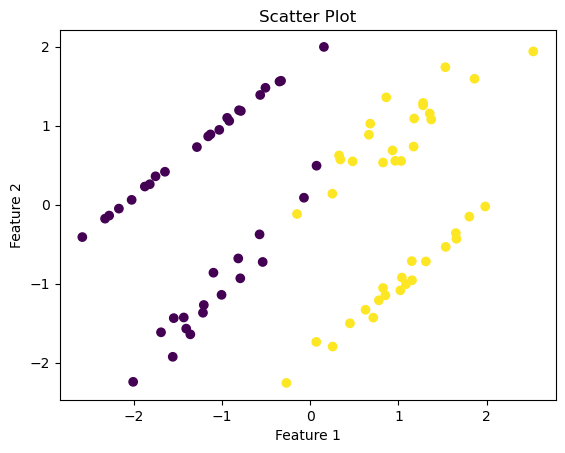

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic classification dataset
x, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a scatter plot
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

# Set labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot")

# Show the plot
plt.show()



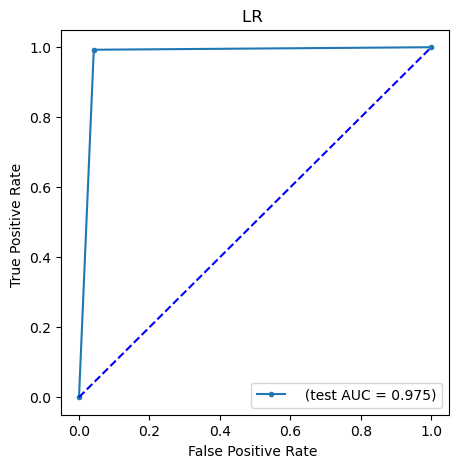

In [255]:
from sklearn.metrics import roc_curve, auc
logistric_regression_fpr, logistric_regression_tpr, threshold = roc_curve(Y_test, prediction_lr)
auc_logistric_regression = auc(logistric_regression_fpr, logistric_regression_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistric_regression_fpr, logistric_regression_tpr, marker='.', label='  (test AUC = %0.3f)' % accuracy_lr)
plt.plot([0,1],[0,1],'b--')
plt.title('LR ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

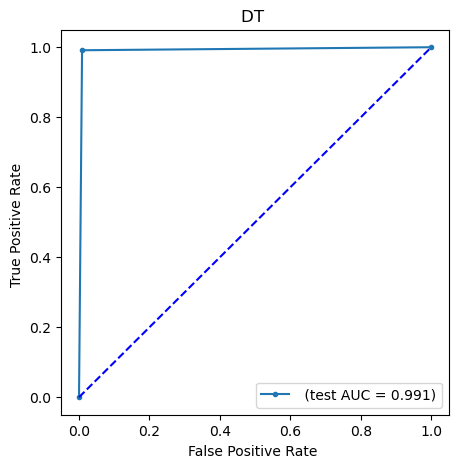

In [256]:
from sklearn.metrics import roc_curve, auc
DecisionTree_fpr, DecisionTree_tpr, threshold = roc_curve(Y_test, prediction_dtc)
auc_DecisionTree = auc(DecisionTree_fpr, DecisionTree_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(DecisionTree_fpr, DecisionTree_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_dt)
plt.plot([0,1],[0,1],'b--')
plt.title('DT ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

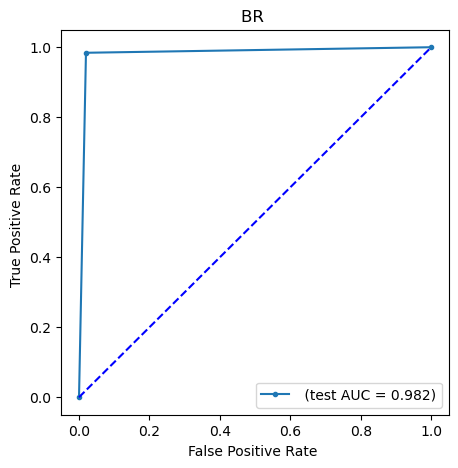

In [257]:
from sklearn.metrics import roc_curve, auc
BernoulliNB_fpr, BernoulliNB_tpr, threshold = roc_curve(Y_test, prediction_bc)
auc_BernoulliNB = auc(BernoulliNB_fpr, BernoulliNB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(BernoulliNB_fpr, BernoulliNB_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_bc)
plt.plot([0,1],[0,1],'b--')
plt.title('BR ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

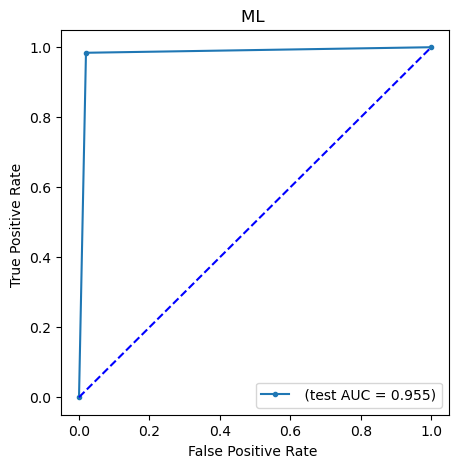

In [258]:
from sklearn.metrics import roc_curve, auc
MultinomialNB_fpr, MultinomialNB_tpr, threshold = roc_curve(Y_test, prediction_mc)
auc_MultinomialNB = auc(MultinomialNB_fpr, MultinomialNB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(BernoulliNB_fpr, BernoulliNB_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_mc)
plt.plot([0,1],[0,1],'b--')
plt.title('ML ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

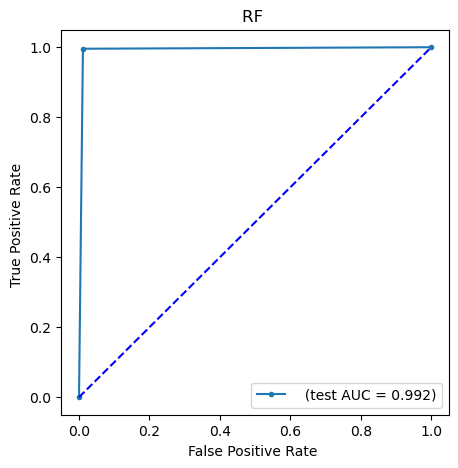

In [259]:
from sklearn.metrics import roc_curve, auc
RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(Y_test, prediction_rfc)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='  (test AUC = %0.3f)' % accuracy_rf)
plt.plot([0,1],[0,1],'b--')
plt.title('RF ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

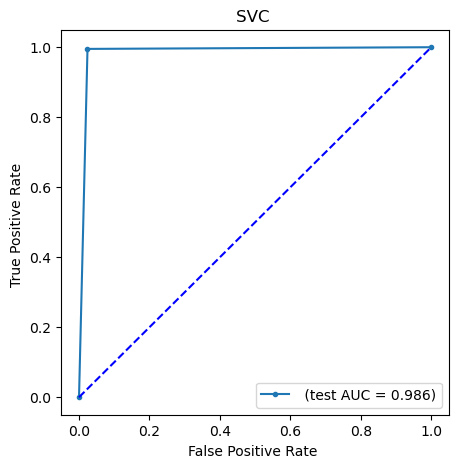

In [260]:
from sklearn.metrics import roc_curve, auc
SVC_fpr, SVC_tpr, threshold = roc_curve(Y_test, prediction_svc)
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SVC_fpr, SVC_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_svc)
plt.plot([0,1],[0,1],'b--')
plt.title('SVC ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

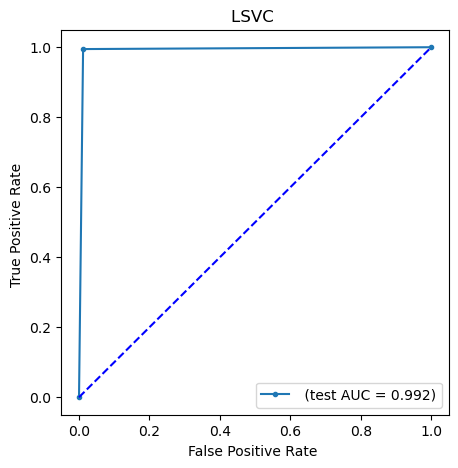

In [261]:
from sklearn.metrics import roc_curve, auc
LSVC_fpr, LSVC_tpr, threshold = roc_curve(Y_test, prediction_lsvc)
auc_SVC = auc(LSVC_fpr, LSVC_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(LSVC_fpr, LSVC_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_lsvc)
plt.plot([0,1],[0,1],'b--')
plt.title('LSVC ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

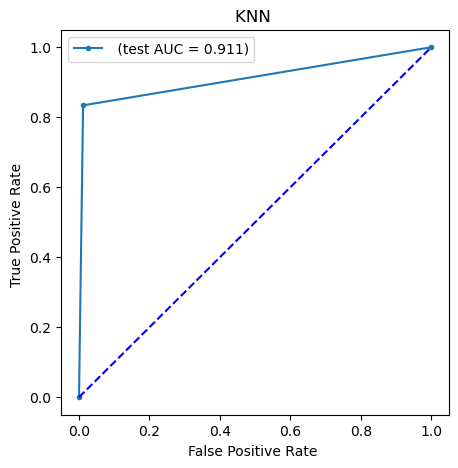

In [262]:
from sklearn.metrics import roc_curve, auc
KNN_fpr, KNN_tpr, threshold = roc_curve(Y_test, prediction_knn)
auc_SVC = auc(KNN_fpr, KNN_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_knn)
plt.plot([0,1],[0,1],'b--')
plt.title('KNN ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

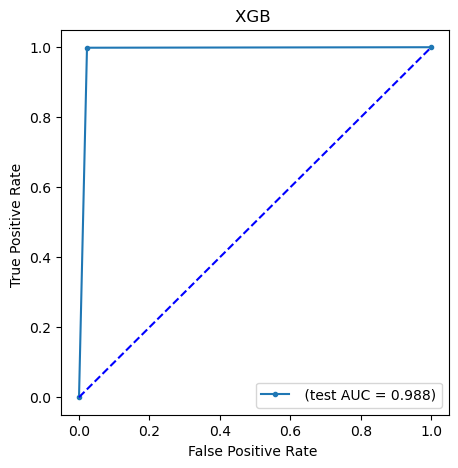

In [263]:
from sklearn.metrics import roc_curve, auc
XGB_fpr, XGB_tpr, threshold = roc_curve(Y_test, prediction_xgb)
auc_SVC = auc(XGB_fpr, XGB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label=' (test AUC = %0.3f)' % accuracy_xgb)
plt.plot([0,1],[0,1],'b--')
plt.title('XGB ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

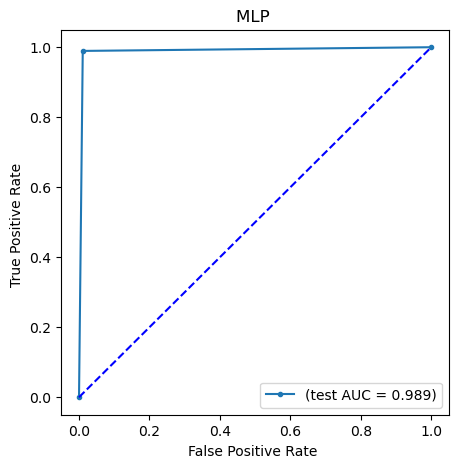

In [264]:
from sklearn.metrics import roc_curve, auc
MLP_fpr, MLP_tpr, threshold = roc_curve(Y_test, prediction_mlp)
auc_SVC = auc(MLP_fpr, MLP_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(MLP_fpr, MLP_tpr, marker='.', label='(test AUC = %0.3f)' % accuracy_mlp)
plt.plot([0,1],[0,1],'b--')
plt.title('MLP ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

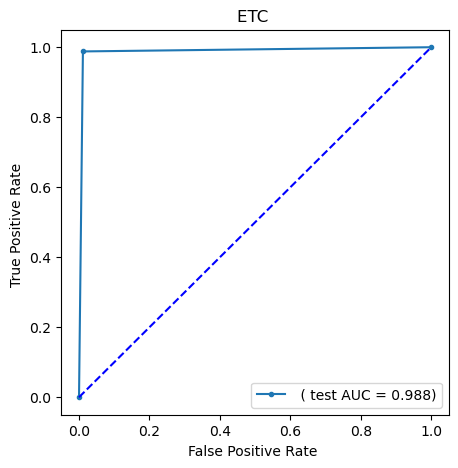

In [265]:
from sklearn.metrics import roc_curve, auc
ETC_fpr, ETC_tpr, threshold = roc_curve(Y_test, prediction_etc)
accuracy_etc = auc(ETC_fpr, ETC_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(ETC_fpr, ETC_tpr, marker='.', label=' ( test AUC = %0.3f)' % accuracy_etc)
plt.plot([0,1],[0,1],'b--')
plt.title('ETC ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()

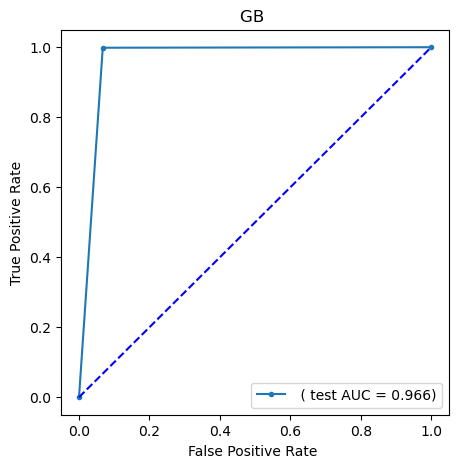

In [266]:
from sklearn.metrics import roc_curve, auc

GBC_fpr, GBC_tpr, threshold = roc_curve(Y_test, prediction_gbc)

accuracy_abc = auc(GBC_fpr, GBC_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(GBC_fpr, GBC_tpr, marker='.', label=' ( test AUC = %0.3f)' % accuracy_gbc)
plt.plot([0,1],[0,1],'b--')
plt.title('GB ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

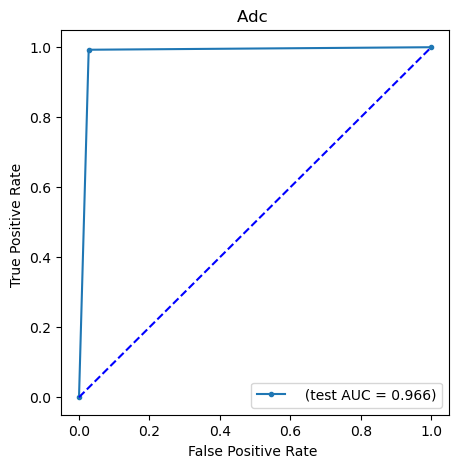

In [267]:
from sklearn.metrics import roc_curve, auc
adaboost_fpr, adaboost_tpr, threshold = roc_curve(Y_test, prediction_abc)
auc_aladaboost = auc(adaboost_fpr, adaboost_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='  (test AUC = %0.3f)' % accuracy_abc)
plt.plot([0,1],[0,1],'b--')
plt.title('Adc ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
plt.show()